<a href="https://colab.research.google.com/github/Magguire/Magguire/blob/main/Copy_of_main_store_forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.0 Importing libraries

In [ ]:
# Importing Pandas
import pandas as pd
# Importing Numpy
import numpy as np
# Importing Matplotlib
import matplotlib.pyplot as plt
# Importing Seaborn
import seaborn as sns

# 1.1 Loading the datasets

In [ ]:
# Step 1.2: Loading our Dataset

# url_hol = 'https://drive.google.com/file/d/1b2Pq6_bkOAweDm7n0bTs69Tk6XVcjIJW/view?usp=sharing'

def load_data(url):
     file_id = url.split('/')[-2]
     dwn_url = 'https://drive.google.com/uc?id='+ file_id
     df = pd.read_csv(dwn_url)
     return df

holidays = load_data('https://drive.google.com/file/d/1b2Pq6_bkOAweDm7n0bTs69Tk6XVcjIJW/view?usp=sharing')
oil = load_data("https://drive.google.com/file/d/1EsDWbT3-K2Bcn3xHs2X9DKDUAR3UBiXg/view?usp=sharing")
stores = load_data("https://drive.google.com/file/d/1UjgiCaRyfS_R69c3piS_JsyYCK3ZaYXu/view?usp=sharing")
test = load_data("https://drive.google.com/file/d/1kc6lVh4PIpaMbhog4BqHUGt2DsjDW8gg/view?usp=sharing")
transactions =load_data("https://drive.google.com/file/d/1-duHsnN6-9ZhMrw6nqEC5KciQjMy3QAp/view?usp=sharing")

# Train dataset is very large
train = pd.read_csv("/content/train.csv", index_col='id')


# previewing the datasets

In [ ]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         350 non-null    object
 1   type         350 non-null    object
 2   locale       350 non-null    object
 3   locale_name  350 non-null    object
 4   description  350 non-null    object
 5   transferred  350 non-null    bool  
dtypes: bool(1), object(5)
memory usage: 14.1+ KB


In [ ]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [ ]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [ ]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [ ]:
train.tail()

,date,store_nbr,family,sales,onpromotion
id,,,,,
3000883,2017-08-15,9,POULTRY,438.133,0
3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8
3000887,2017-08-15,9,SEAFOOD,16.000,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 137.4+ MB


In [ ]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [ ]:
data = pd.concat([train, test], axis=0, ignore_index=True)
data.drop(['id'], axis = 1, inplace=True)
data.head()

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3029400 entries, 0 to 3029399
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 115.6+ MB


In [ ]:
data.tail()

,date,store_nbr,family,sales,onpromotion
3029395,2017-08-31,9,POULTRY,NaN,1
3029396,2017-08-31,9,PREPARED FOODS,NaN,0
3029397,2017-08-31,9,PRODUCE,NaN,1
3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,NaN,9
3029399,2017-08-31,9,SEAFOOD,NaN,0


In [ ]:
def merge(t1,t2):
    final = t1.merge(t2, how= 'left', on = 'date')
    return final

df1 = merge(data, holidays)
df1.head()


,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   type         object 
 6   locale       object 
 7   locale_name  object 
 8   description  object 
 9   transferred  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 258.7+ MB


In [ ]:
df3 = merge(df1, oil)
df3.head()

,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         object 
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   type         object 
 6   locale       object 
 7   locale_name  object 
 8   description  object 
 9   transferred  object 
 10  dcoilwtico   float64
dtypes: float64(2), int64(2), object(7)
memory usage: 282.2+ MB


In [ ]:
store = df3.merge(transactions[['store_nbr', 'date', 'transactions']], how='left')
store.head()

,date,store_nbr,family,sales,onpromotion,type,locale,locale_name,description,transferred,dcoilwtico,transactions
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN


In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   type          object 
 6   locale        object 
 7   locale_name   object 
 8   description   object 
 9   transferred   object 
 10  dcoilwtico    float64
 11  transactions  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 305.8+ MB


In [ ]:
df = store.merge(stores, how='left', on='store_nbr')
df.head()

,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,transactions,city,state,type_y,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   date          object 
 1   store_nbr     int64  
 2   family        object 
 3   sales         float64
 4   onpromotion   int64  
 5   type_x        object 
 6   locale        object 
 7   locale_name   object 
 8   description   object 
 9   transferred   object 
 10  dcoilwtico    float64
 11  transactions  float64
 12  city          object 
 13  state         object 
 14  type_y        object 
 15  cluster       int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 399.8+ MB


In [ ]:
# Renaming columns
df.rename(columns={'type_x': 'holiday_type',
                   'type_y': 'store_type',
                   'dcoilwtico': 'daily_oil_prices'}, inplace=True)
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN,Quito,Pichincha,D,13


In [ ]:
# Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3082860 entries, 0 to 3082859
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   store_nbr         int64  
 2   family            object 
 3   sales             float64
 4   onpromotion       int64  
 5   holiday_type      object 
 6   locale            object 
 7   locale_name       object 
 8   description       object 
 9   transferred       object 
 10  daily_oil_prices  float64
 11  transactions      float64
 12  city              object 
 13  state             object 
 14  store_type        object 
 15  cluster           int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 399.8+ MB


In [ ]:
df.dtypes

date                 object
store_nbr             int64
family               object
sales               float64
onpromotion           int64
holiday_type         object
locale               object
locale_name          object
description          object
transferred          object
daily_oil_prices    float64
transactions        float64
city                 object
state                object
store_type           object
cluster               int64
dtype: object

In [ ]:
# Convert sales to float
df['sales'] = df['sales'].astype('float')
df['sales'].dtypes

dtype('float64')

# 1.2 Data cleaning

### Validation

In [ ]:
'''def plot_boxplot(column):
    sns.boxplot(y=df[column],  )
    return plt.show()

col_names = ['daily_oil_prices','transactions','sales']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y = df[col_val], ax= ax[i])
  ax[i].set_title('Box plot = {}'.format(col_val), fontsize=10)
  ax[i].set_xlabel(col_val, fontsize= 8)
  plt.show()    

for column in columns:
     sns.boxplot(y=df[column])
     plt.title(column)
     plt.show()'''

"def plot_boxplot(column):\n    sns.boxplot(y=df[column],  )\n    return plt.show()\n\ncol_names = ['daily_oil_prices','transactions','sales']\n\nfig, ax = plt.subplots(len(col_names), figsize=(8,40))\n\nfor i, col_val in enumerate(col_names):\n  sns.boxplot(y = df[col_val], ax= ax[i])\n  ax[i].set_title('Box plot = {}'.format(col_val), fontsize=10)\n  ax[i].set_xlabel(col_val, fontsize= 8)\n  plt.show()    \n\nfor column in columns:\n     sns.boxplot(y=df[column])\n     plt.title(column)\n     plt.show()"

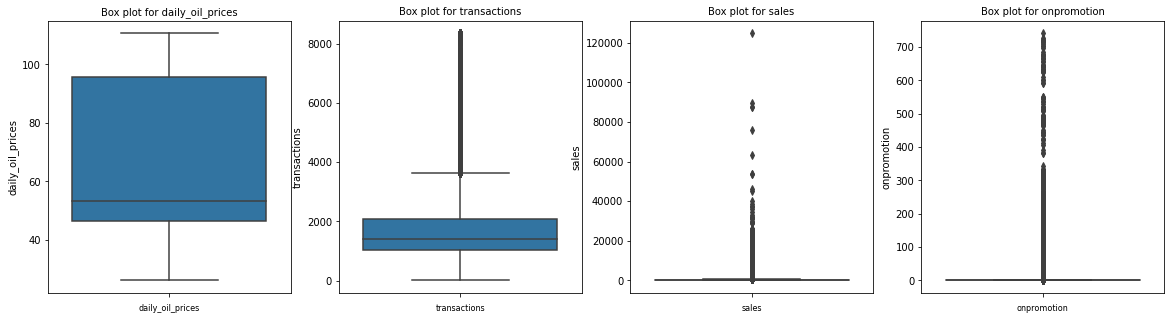

In [ ]:
# Check for outliers

col_names = ['daily_oil_prices','transactions','sales', 'onpromotion']

def box(columns):
  fig, ax = plt.subplots(ncols = len(columns), figsize=(20,5))

  for i, col_val in enumerate(columns):
      sns.boxplot(y = df[col_val], ax= ax[i])
      ax[i].set_title('Box plot for {}'.format(col_val), fontsize=10)
      ax[i].set_xlabel(col_val, fontsize= 8)
  return plt.show()    


box(col_names)


In [ ]:
# checking for anomalies

# quantiles

def quantiles(columns):
  for column in columns:
      Q1 = df[column].quantile(0.25)
      Q3 = df[column].quantile(0.75)
      IQR = Q3 - Q1
      lb = Q1 - (1.5 * IQR)
      ub = Q3 + (1.5 * IQR)
      print(f'{column} : \nQ1={Q1},Q3={Q3}, IQR={IQR}, lowerbound={lb}, upperbound={ub}')

quantiles(col_names)


daily_oil_prices : 
Q1=46.46,Q3=95.72, IQR=49.26, lowerbound=-27.43, upperbound=169.61
transactions : 
Q1=1046.0,Q3=2081.0, IQR=1035.0, lowerbound=-506.5, upperbound=3633.5
sales : 
Q1=0.0,Q3=196.011, IQR=196.011, lowerbound=-294.0165, upperbound=490.02750000000003
onpromotion : 
Q1=0.0,Q3=0.0, IQR=0.0, lowerbound=0.0, upperbound=0.0


In [ ]:
# Look for Negative sales values
df[df['sales'] < 0]

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster


In [ ]:
# Look for Negative transactions values
df[df['transactions'] < 0]

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster


In [ ]:
# Missing values
df.isnull().sum()

date                      0
store_nbr                 0
family                    0
sales                 28512
onpromotion               0
holiday_type        2578554
locale              2578554
locale_name         2578554
description         2578554
transferred         2578554
daily_oil_prices     962280
transactions         277629
city                      0
state                     0
store_type                0
cluster                   0
dtype: int64

In [ ]:
df.dropna(thresh=10, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2993826 entries, 0 to 3070385
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   store_nbr         int64  
 2   family            object 
 3   sales             float64
 4   onpromotion       int64  
 5   holiday_type      object 
 6   locale            object 
 7   locale_name       object 
 8   description       object 
 9   transferred       object 
 10  daily_oil_prices  float64
 11  transactions      float64
 12  city              object 
 13  state             object 
 14  store_type        object 
 15  cluster           int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 388.3+ MB


In [ ]:
# Fill null daily oil prices with their mean
df['daily_oil_prices'] = df['daily_oil_prices'].fillna(df['daily_oil_prices'].mean()) 

oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [ ]:
# Fill null holiday_type with 'normal'
df['holiday_type'].fillna('Normal', inplace=True)

In [ ]:
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,description,transferred,daily_oil_prices,transactions,city,state,store_type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,67.998253,NaN,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,67.998253,NaN,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,67.998253,NaN,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,67.998253,NaN,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,67.998253,NaN,Quito,Pichincha,D,13


In [ ]:
# Fill null locale and locale_name  with 'unknown'
df['locale'].fillna('Unknown', inplace=True)
df['locale_name'].fillna('Unknown', inplace=True)

In [ ]:
df['locale_name'].unique()

array(['Ecuador', 'Unknown', 'Manta', 'Cotopaxi', 'Cuenca', 'Libertad',
       'Riobamba', 'Puyo', 'Guaranda', 'Imbabura', 'Machala', 'Latacunga',
       'El Carmen', 'Santo Domingo', 'Cayambe', 'Guayaquil', 'Esmeraldas',
       'Ambato', 'Ibarra', 'Quevedo', 'Santo Domingo de los Tsachilas',
       'Santa Elena', 'Quito', 'Loja', 'Salinas'], dtype=object)

In [ ]:
df['locale'].unique()

array(['National', 'Unknown', 'Local', 'Regional'], dtype=object)

In [ ]:
# Fill null sales with 0
df.sales = df.sales.fillna(0.0)

In [ ]:
# Drop description for holidays

df.drop(['description'], axis=1, inplace=True)

In [ ]:
# Fill null transferred with unspecified
df['transferred'] = df.transferred.fillna('unspecified') 

In [ ]:
df.transferred.isnull().sum()

0

In [ ]:
df.transferred.unique()

array([False, 'unspecified', True], dtype=object)

In [ ]:
# Convert boolean values of transferred to string
df.transferred = df.transferred.replace(False,'false').replace(True,'true')

In [ ]:
df.transferred.unique()

array(['false', 'unspecified', 'true'], dtype=object)

In [ ]:
# Fill null transactions with 0
transactions.isnull().sum()


df.transactions.fillna('0', inplace=True)

# convert transactions to integer
df.transactions = df.transactions.astype(int)

In [ ]:
# Convert onpromotion to integer
df['onpromotion'] = df['onpromotion'].astype(int)
df['onpromotion'].dtypes

dtype('int64')

 Since the transactions dataset has no missing values, fill null values with 0.

In [ ]:
# The number of missing values
df.isnull().sum().sum()

0

In [ ]:
# Check for duplicates
df.duplicated().sum()


1782

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,transferred,daily_oil_prices,transactions,city,state,store_type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13


In [ ]:
# check for whitespaces

# column name 
df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# column values
for column in df.columns:
  if df[column].dtypes == 'object':
    df[column] = df[column].str.lstrip(' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  after removing the cwd from sys.path.


In [ ]:
# information about our dataset
df.info()
df.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2992044 entries, 0 to 3070385
Data columns (total 15 columns):
 #   Column            Dtype  
---  ------            -----  
 0   date              object 
 1   store_nbr         int64  
 2   family            object 
 3   sales             float64
 4   onpromotion       int64  
 5   holiday_type      object 
 6   locale            object 
 7   locale_name       object 
 8   transferred       object 
 9   daily_oil_prices  float64
 10  transactions      int64  
 11  city              object 
 12  state             object 
 13  store_type        object 
 14  cluster           int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 365.2+ MB


date                2992044
store_nbr           2992044
family              2992044
sales               2992044
onpromotion         2992044
holiday_type        2992044
locale              2992044
locale_name         2992044
transferred         2992044
daily_oil_prices    2992044
transactions        2992044
city                2992044
state               2992044
store_type          2992044
cluster             2992044
dtype: int64

## Exploratory Data Analysis

### a.) Univariate

In [ ]:
#Summary statistics

df.describe(include='all')

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,transferred,daily_oil_prices,transactions,city,state,store_type,cluster
count,2992044,2.992044e+06,2992044,2.992044e+06,2.992044e+06,2992044,2992044,2992044,2992044,2.992044e+06,2.992044e+06,2992044,2992044,2992044,2.992044e+06
unique,1684,NaN,33,NaN,NaN,7,4,25,3,NaN,NaN,22,16,5,NaN
top,2014-06-25,NaN,AUTOMOTIVE,NaN,NaN,Normal,Unknown,Unknown,unspecified,NaN,NaN,Quito,Pichincha,D,NaN
freq,7128,NaN,90668,NaN,NaN,2489520,2489520,2489520,2489520,NaN,NaN,1009734,1066230,1003497,NaN
mean,NaN,2.736776e+01,NaN,3.657093e+02,2.669985e+00,NaN,NaN,NaN,NaN,6.799825e+01,1.590041e+03,NaN,NaN,NaN,8.493239e+00
std,NaN,1.559206e+01,NaN,1.115916e+03,1.236006e+01,NaN,NaN,NaN,NaN,2.152532e+01,1.022680e+03,NaN,NaN,NaN,4.667865e+00
min,NaN,1.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,2.619000e+01,0.000000e+00,NaN,NaN,NaN,1.000000e+00
25%,NaN,1.400000e+01,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,4.895000e+01,9.600000e+02,NaN,NaN,NaN,4.000000e+00
50%,NaN,2.700000e+01,NaN,1.200000e+01,0.000000e+00,NaN,NaN,NaN,NaN,6.799825e+01,1.347000e+03,NaN,NaN,NaN,9.000000e+00
75%,NaN,4.100000e+01,NaN,2.040000e+02,0.000000e+00,NaN,NaN,NaN,NaN,9.215000e+01,2.003000e+03,NaN,NaN,NaN,1.300000e+01


In [ ]:
# Function to plot barchart
def plotbar(column, figsize):
  plt.figure(figsize = figsize)
  df[column].value_counts().plot.bar()
  plt.title('Bar chart representation for {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Count')
  return plt.show()

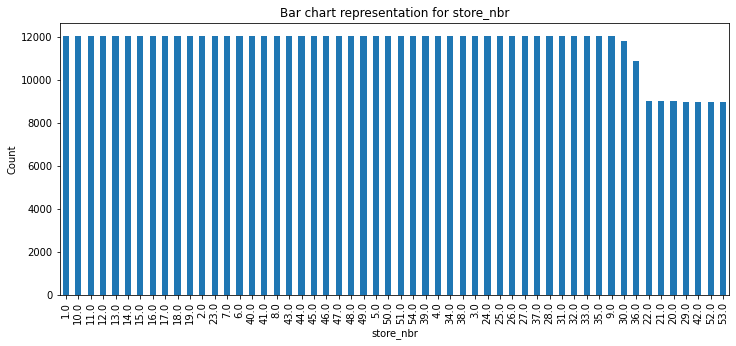

In [ ]:
# Store number representation
plotbar('store_nbr', (12,5))

Only 7 stores are not equally represented in the dataset

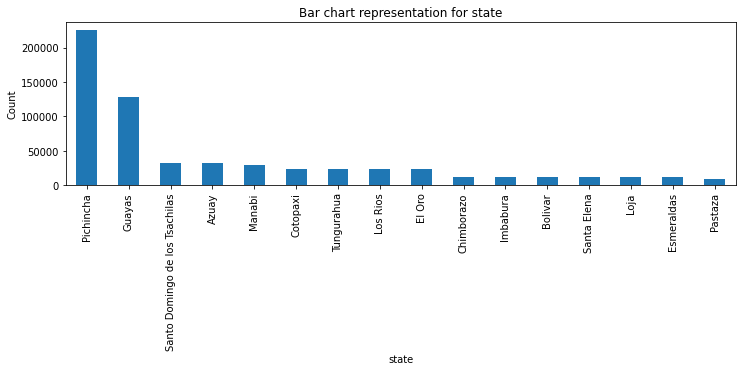

In [ ]:
# state representation
plotbar('state', (12,3))



Pichincha has the highest representation while Pastaza has the least count in the dataset.

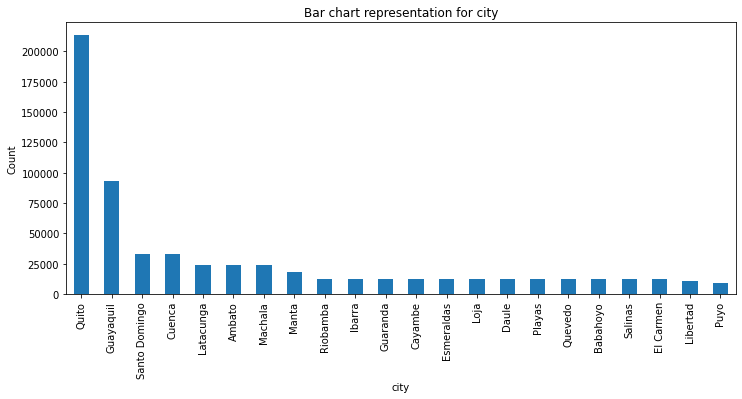

In [ ]:
# city representation
plotbar('city', (12,5))



Quito city has the highest representation while Puyo city has the least.

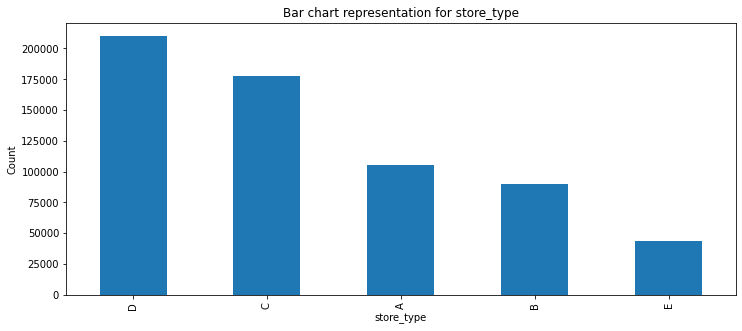

In [ ]:
# store_type representation
plotbar('store_type', (12,5))

Type D stores have the highest representation while Type E has the least representation.

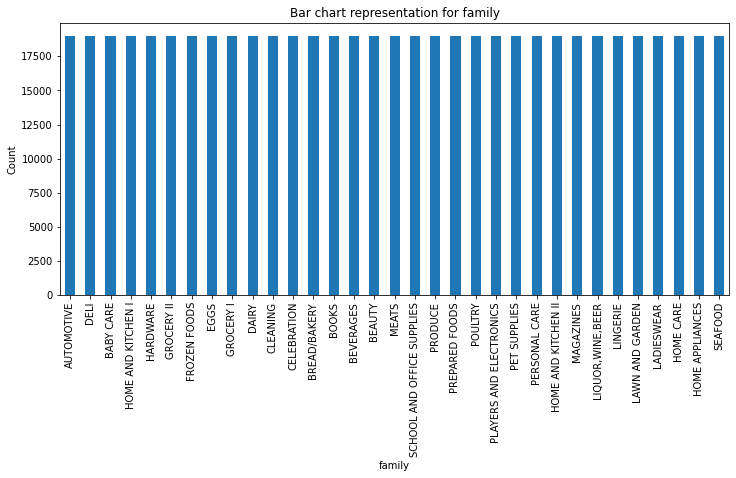

In [ ]:
# Family representation
plotbar('family', (12,5))

All family products are equally represented.

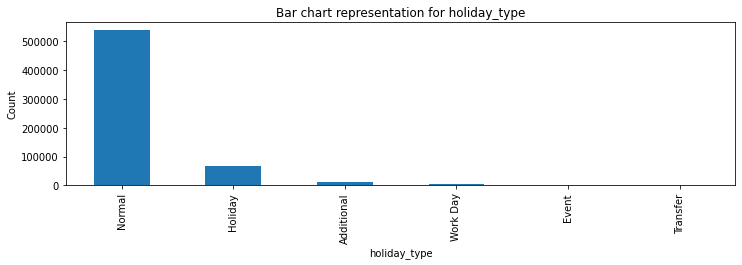

In [ ]:
# Bar chart for holiday_type
plotbar('holiday_type', (12,3))

Normal - Not a holiday

Holiday - A single day for holiday

Event - A special function day

Additional - Additional days that surround a major seasonal holiday 

Work Day - Working day

Bridge - extra days that are added to a holiday (e.g., to extend the break across a long weekend).

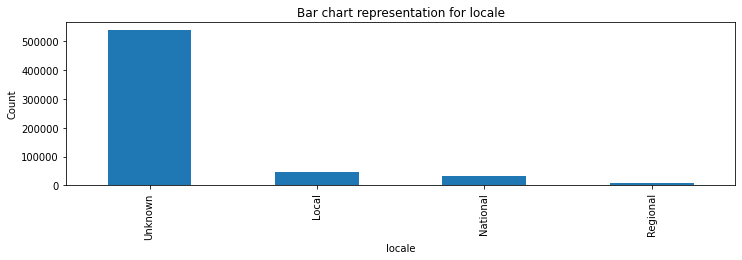

In [ ]:
plotbar('locale', (12,3))

In [ ]:
# pie chart function.

def pie(column, explode): 
    df[column].value_counts().plot.pie(autopct='%1.1f%%', explode = explode, shadow=True, startangle=40)
    plt.axis('equal')
    plt.title('Pie chart for {}'.format(column))
    return plt.show()

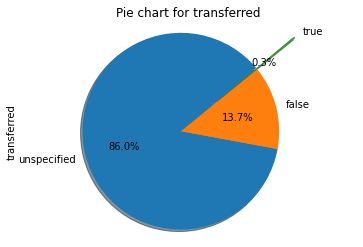

In [ ]:
# Pie chart for transferred
pie('transferred', (0,0,0.5))

Very few days that were holidays have been transferred to other days.

### b.) Bivariate analysis

i.) Numerical - Numerical

In [ ]:
# orrelation between variables
df.corr()

,store_nbr,sales,onpromotion,daily_oil_prices,transactions,cluster
store_nbr,1.000000,0.028766,0.001181,-0.000182,0.064536,-0.069887
sales,0.028766,1.000000,-0.006425,0.009011,0.224056,0.038858
onpromotion,0.001181,-0.006425,1.000000,-0.202583,-0.031338,0.000497
daily_oil_prices,-0.000182,0.009011,-0.202583,1.000000,0.041835,0.000110
transactions,0.064536,0.224056,-0.031338,0.041835,1.000000,0.188729
cluster,-0.069887,0.038858,0.000497,0.000110,0.188729,1.000000


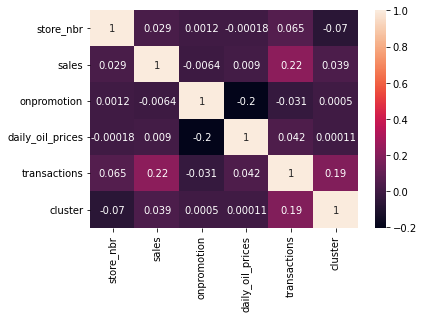

In [ ]:
# Heatmap for correlation
sns.heatmap(df.corr(), annot = True)

Most of the variables are either positively or negatively weakly correlated.

Sales to transactions and Sales to on_promotion are moderately positively correlated. 

In [ ]:
# scatter plot function
def plotscatter(column1, column2):
  plt.scatter(df[column1], df[column2])
  plt.xlabel(column1)
  plt.ylabel(column2)
  plt.title('Scatter plot for {} and {}'.format(column1, column2))
  return plt.show()

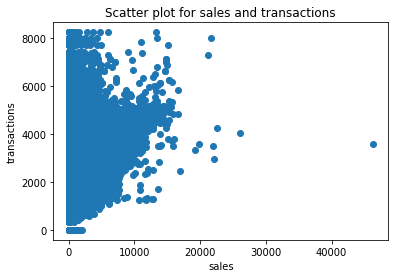

In [ ]:
plotscatter('sales', 'transactions')

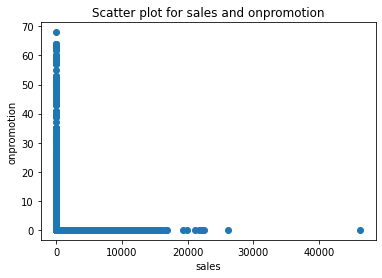

In [ ]:
plotscatter('sales', 'onpromotion')

In [ ]:
'''# pairplot
sns.pairplot(df)
plt.title('Pairplot for numerical variables.')
plt.show()'''

ii.) Categorical - Numerical

In [ ]:
# Categorical to numerical bar chart

def barchart(column1, column2, figsize):
    group.plot(x=column1, y=column2, kind='bar', figsize=figsize) 
    plt.title(f'Barchart for {column1} vs {column2}')
    plt.xlabel(column1)
    plt.ylabel(column2)
    return plt.show()

<Figure size 720x216 with 0 Axes>

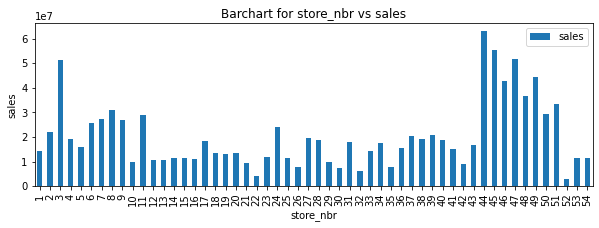

In [ ]:
group = df.groupby('store_nbr', as_index=False)['sales'].sum()
barchart('store_nbr','sales', (10,3))

store_nbr 44 has the most sales while store_nbr has 52 sales.

In [ ]:
# Group data by date
grouped = df.groupby(['date'], as_index=False).sum()
grouped.head()

,date,store_nbr,sales,onpromotion,daily_oil_prices,transactions,cluster
0,2013-01-01,49005.0,2511.618999,0,174208.017646,25410,15114.0
1,2013-01-02,49005.0,496092.417944,0,165975.480000,3076095,15114.0
2,2013-01-03,49005.0,361461.231124,0,165672.540000,2590632,15114.0
3,2013-01-04,49005.0,354459.677093,0,165939.840000,2590302,15114.0
4,2013-01-05,49005.0,477350.121229,0,174208.017646,3087909,15114.0


In [ ]:
grouped.drop(['cluster'], axis=1, inplace=True)
grouped.head()

,date,store_nbr,sales,onpromotion,daily_oil_prices,transactions
0,2013-01-01,49005.0,2511.618999,0,174208.017646,25410
1,2013-01-02,49005.0,496092.417944,0,165975.480000,3076095
2,2013-01-03,49005.0,361461.231124,0,165672.540000,2590632
3,2013-01-04,49005.0,354459.677093,0,165939.840000,2590302
4,2013-01-05,49005.0,477350.121229,0,174208.017646,3087909


In [ ]:
# convert date to datetime
from datetime import datetime
grouped['date'] = pd.to_datetime(grouped['date'])
grouped['date'].dtypes

dtype('<M8[ns]')

In [ ]:
# Line graphs

def line(column1, column2, figsize):
    plt.figure(figsize = figsize)
    plt.plot(grouped[column1], grouped[column2])
    plt.xticks(rotation=90)
    plt.title("{} vs {}".format(column1, column2), fontsize=14, y=1.015)
    return plt.show()

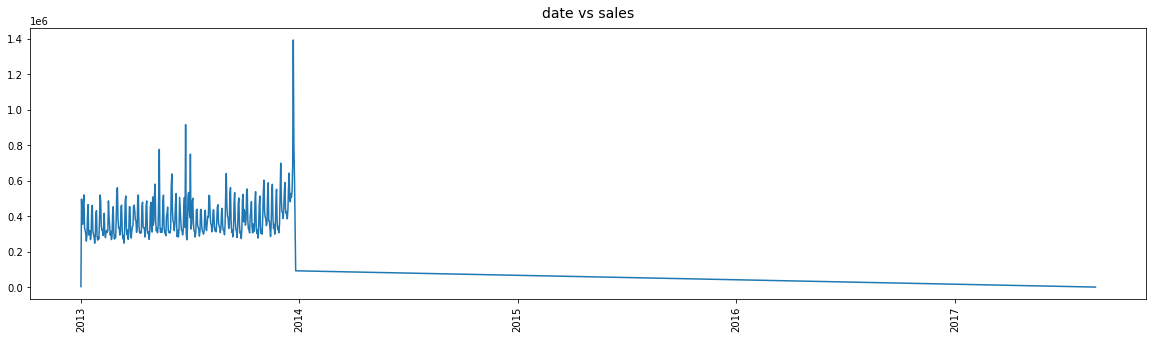

In [ ]:
line('date', 'sales', (20,5))

There has been an activity between 2013 and 2014, followed by steady downward trend in sales past 2017.

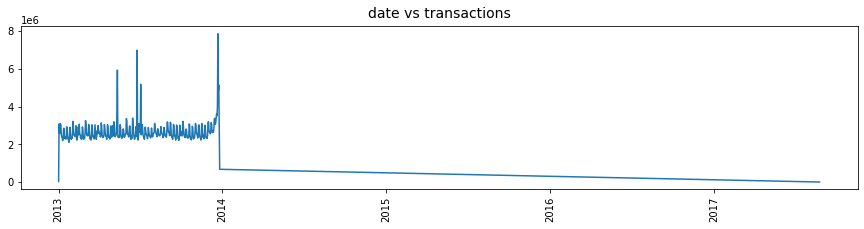

In [ ]:
line('date', 'transactions', (15,3))

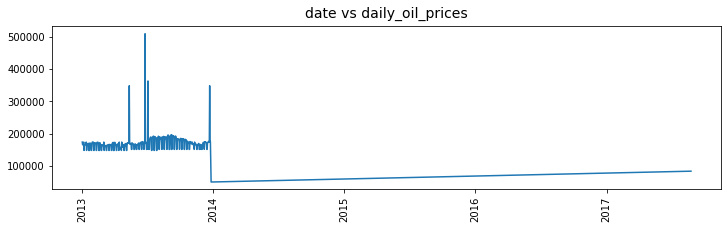

In [ ]:
line('date', 'daily_oil_prices', (12,3))

There has been fluctuations in daily oil prices between 2013 and 2014. There was a major drop in 2014 followed by a steady upward trend in the following years.

## 1.3 Hypothesis Testing

We suspect that the downward trend in sales could be caused by an increase in daily oil prices hence we shall confirm this using a hypothesis test.

### 1. Defining H0 and H1
 H0: The mean daily oil prices in 2014 is equal to the mean daily oil prices in 2016.

H1: The mean daily oil prices in 2014 is lower than the mean daily oil prices in 2016.

### Sampling

We are going to use stratified sampling method to select our sample to use for our hypothesis test. The strata will be the years 2014 and 2016.

In [ ]:
# convert date to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,transferred,daily_oil_prices,transactions,city,state,store_type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13


In [ ]:
# create a column for year inorder to split dataset according to year

df['year'] = pd. DatetimeIndex(df['date']). year
df.head()

,date,store_nbr,family,sales,onpromotion,holiday_type,locale,locale_name,transferred,daily_oil_prices,transactions,city,state,store_type,cluster,year
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13,2013
1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13,2013
2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13,2013
3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13,2013
4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,false,67.998253,0,Quito,Pichincha,D,13,2013


In [ ]:
sample_data = df[(df['year'] == 2014) | (df['year'] == 2016)]

In [ ]:
sample_data['year'].value_counts()

2016    661386
2014    639045
Name: year, dtype: int64

In [ ]:
# Using stratified sampling
sample = sample_data.groupby(['year'], group_keys=False).apply(lambda group: group.sample(frac=0.0005))

# Choosing 2 random samples from the cluster sample 

sample['year'].value_counts()

2016    331
2014    320
Name: year, dtype: int64

- We will classify the population into two independent samples.
1. Sample for 2014.
2. Sample for 2016.
- Then we will check for normality to get the test we should use, whether parametric or non-parametric.


In [ ]:
# Split the datasets into 2016 and 2014.
s16 = sample[sample['year'] == 2016]
s14 = sample[sample['year'] == 2014]

### 2. Choosing significance level

We shall use the most common significane level of 5%. i.e α = 0.05

In [ ]:
# Check variability
from scipy.stats import levene
levene(s16['daily_oil_prices'], s14['daily_oil_prices'])

LeveneResult(statistic=61.733990443292264, pvalue=1.6366101524071588e-14)

Since the p_value < 0.05, there is no homogenity between variables.

In [ ]:
# Check for normality using shapiro wilk test
from scipy.stats import shapiro
shapiro(sample['daily_oil_prices'])

(0.9215773940086365, 6.7598432156946126e-18)

The p_value < 0.05 hence, hence not Gaussian. 

Since both conditions for parametric tests have not been met, we shall use non_parametric test.

### 3. Determining statistic and p value using Mann Whitney U-test.

In [ ]:
# Performing non_parametric test

# importing stats from scipy

from scipy import stats

stats.mannwhitneyu(s14['daily_oil_prices'],s16['daily_oil_prices']) 

MannwhitneyuResult(statistic=6913.0, pvalue=1.7183126549884576e-84)

### 4. Decision

The p_value(1.72e-84) < 0.05(significance level) hence we reject the null hypothesis.


### 5. Conclusion
Our test is statistically significant. 

We have enough evidence that mean daily oil prices in 2014 is less than mean daily oil price in 2016.

## Time series

In [ ]:
# Grouping date values by summing daily oil prices for all stores
df1 = df.groupby('date')[['daily_oil_prices', 'sales']].mean()

In [ ]:
df1.head()

,daily_oil_prices,sales
date,,
2013-01-01,67.998253,1.409438
2013-01-02,93.140000,278.390807
2013-01-03,92.970000,202.840197
2013-01-04,93.120000,198.911154
2013-01-05,67.998253,267.873244


In [ ]:
# confirming date as index
df1.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-08-07', '2017-08-08', '2017-08-09', '2017-08-10',
               '2017-08-11', '2017-08-12', '2017-08-13', '2017-08-14',
               '2017-08-15', '2017-08-24'],
              dtype='datetime64[ns]', name='date', length=1684, freq=None)

### Visualizations

In [ ]:
# setting seaborn figuresize

sns.set(rc={'figure.figsize':(11, 8)})

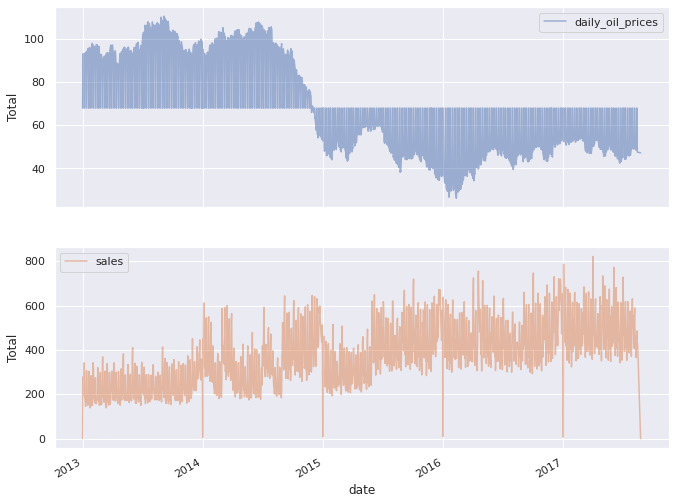

In [ ]:
# Line plot

cols_plot = ['daily_oil_prices', 'sales']
axes = df1[cols_plot].plot(alpha=0.5, figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Total')

#df1[['daily_oil_prices', 'sales']].plot(linewidth=0.5)
#plt.title('Daily Oil Prices and sales Trend')
#plt.ylabel('daily_oil_prices/ sales')
#plt.show()

There are so many data points hence the line plot is crowded and hard to read. Let’s plot the data as dots instead.

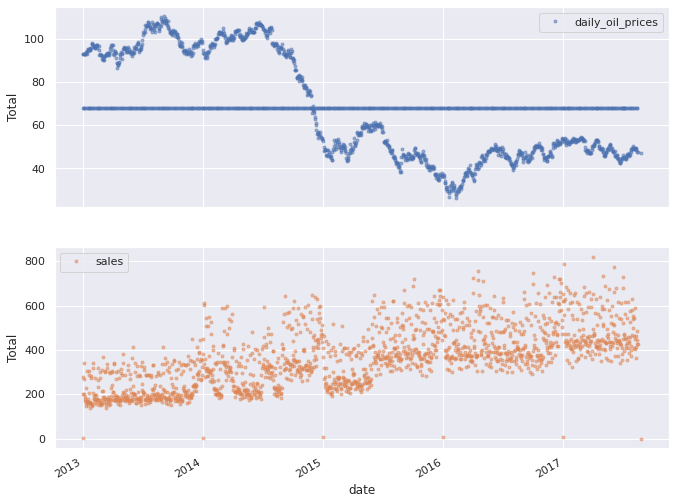

In [ ]:
# Dotted plot

cols_plot = ['daily_oil_prices', 'sales']
axes = df1[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Total')

#df1['daily_oil_prices'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 5))
#plt.title('Daily Oil Prices Trend')
#plt.ylabel('daily_oil_prices')
#plt.show()

Daily oil prices was highest near the end of 2013 and lowest at the beginning of 2016.

The daily oil price dropped below the mean at the end of 2014 onwards.



The mean sales per day has a high volatility. It is difficult to determine mean sales per day from the curve.

#### Seasonality

Text(0, 0.5, 'Daily Oil Prices')

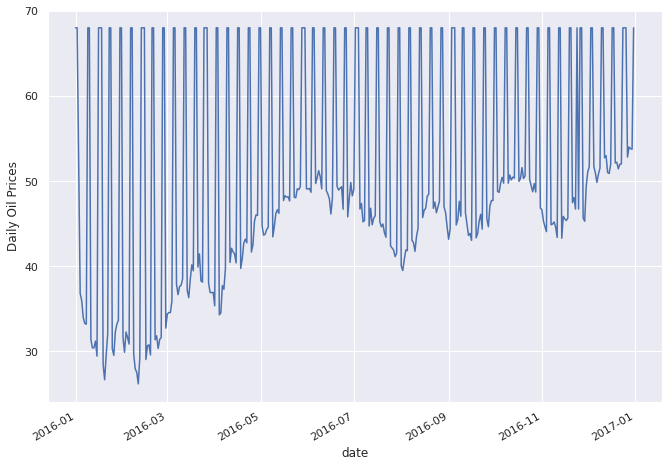

In [ ]:
ax = df1.loc['2016', 'daily_oil_prices'].plot()
ax.set_ylabel('Daily Oil Prices')

We can see the weekly oscillations. The daily oil prices gradually increases from March 2016 to January 2017. 

There was a slight increase in daily oil prices during the earthquake in April 2016. It then dropped then increased gradually afterwards. 


Text(0, 0.5, 'Daily Oil Prices')

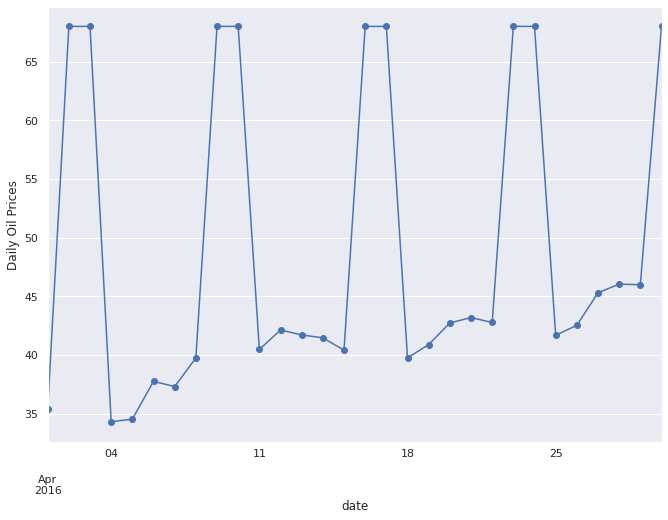

In [ ]:
# Looking into 16/04/2016, the day of the earthquake phenomena
ax = df1.loc['2016-04', 'daily_oil_prices'].plot(linestyle='-', marker='o')
ax.set_ylabel('Daily Oil Prices')

Text(0, 0.5, 'Total sales')

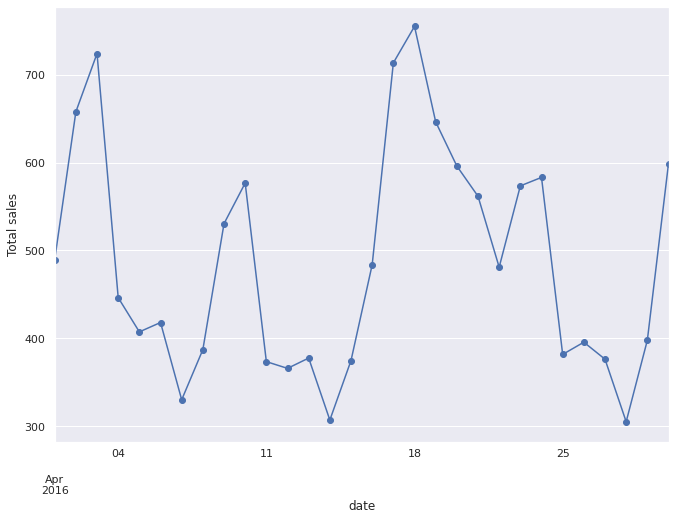

In [ ]:
ax = df1.loc['2016-04', 'sales'].plot(linestyle='-', marker='o')
ax.set_ylabel('Total sales')

There is a very steep increase in sales on 16th to 17th April.

A magnitude 7.8 earthquake struck Ecuador on April 16, 2016. People rallied to assist the victims of the earthquake with water and first need products. This could led to the increase in sales for the next two days. 

Due to the impact, supermarket sales were greatly affected for several weeks after the earthquake.

#### Customizing time series plots

In [ ]:
# for nicely formatted tick labels

import matplotlib.dates as mdates

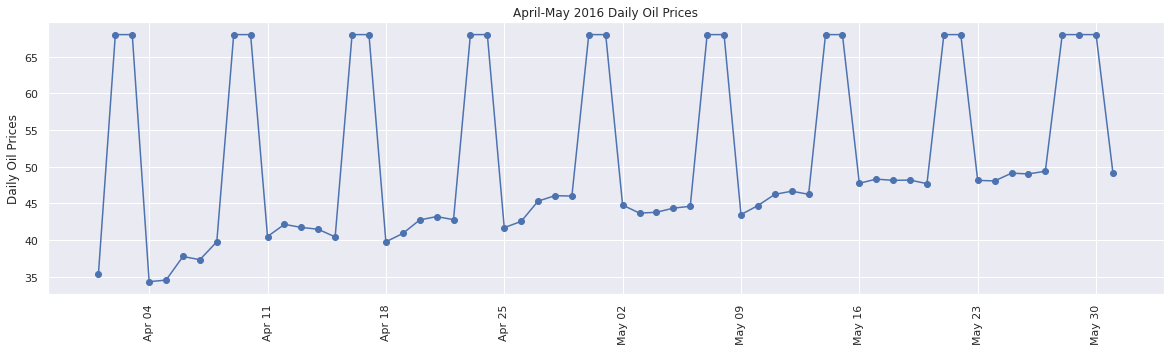

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df1.loc['2016-04':'2016-05', 'daily_oil_prices'], marker='o', linestyle='-')
ax.set_ylabel('Daily Oil Prices')
plt.xticks(rotation=90)
ax.set_title('April-May 2016 Daily Oil Prices')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

Daily oil prices are low during the week and high during the weekend.

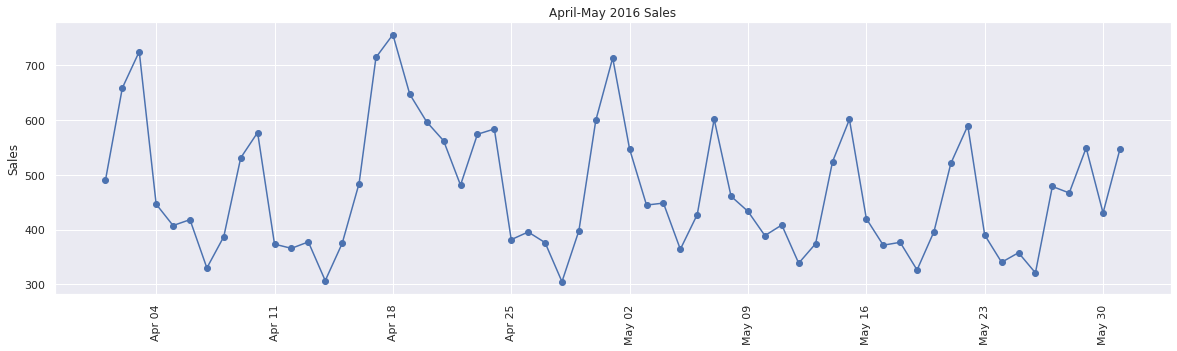

In [ ]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(df1.loc['2016-04':'2016-05', 'sales'], marker='o', linestyle='-')
ax.set_ylabel('Sales')
plt.xticks(rotation=90)
ax.set_title('April-May 2016 Sales')
# Set x-axis major ticks to weekly interval, on Mondays
ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MONDAY))
# Format x-tick labels as 3-letter month name and day number
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'));

The mean sales have been dropping on almost every Thursday of the week.

In [ ]:
# Group 

### Time series forecasting using ARIMA model. 

In [ ]:
# importing necessary libraries
import warnings
import itertools
import statsmodels.api as sm
import matplotlib 

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
results = mod.fit()
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

IndentationError: ignored